<a href="https://colab.research.google.com/github/barath-sk17/ExploratoryDataAnalysis/blob/main/Feature_ExpoAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Obfuscated-MalMem2022.csv to Obfuscated-MalMem2022.csv


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("Obfuscated-MalMem2022.csv")

In [50]:
y = df['Class']
X = df.drop(['Class'], axis = 1)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100,test_size=0.3)

**This heatmap shows the correlation of all the features of the dataset.**

<ipython-input-52-f1789814b4f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = X_train.corr()


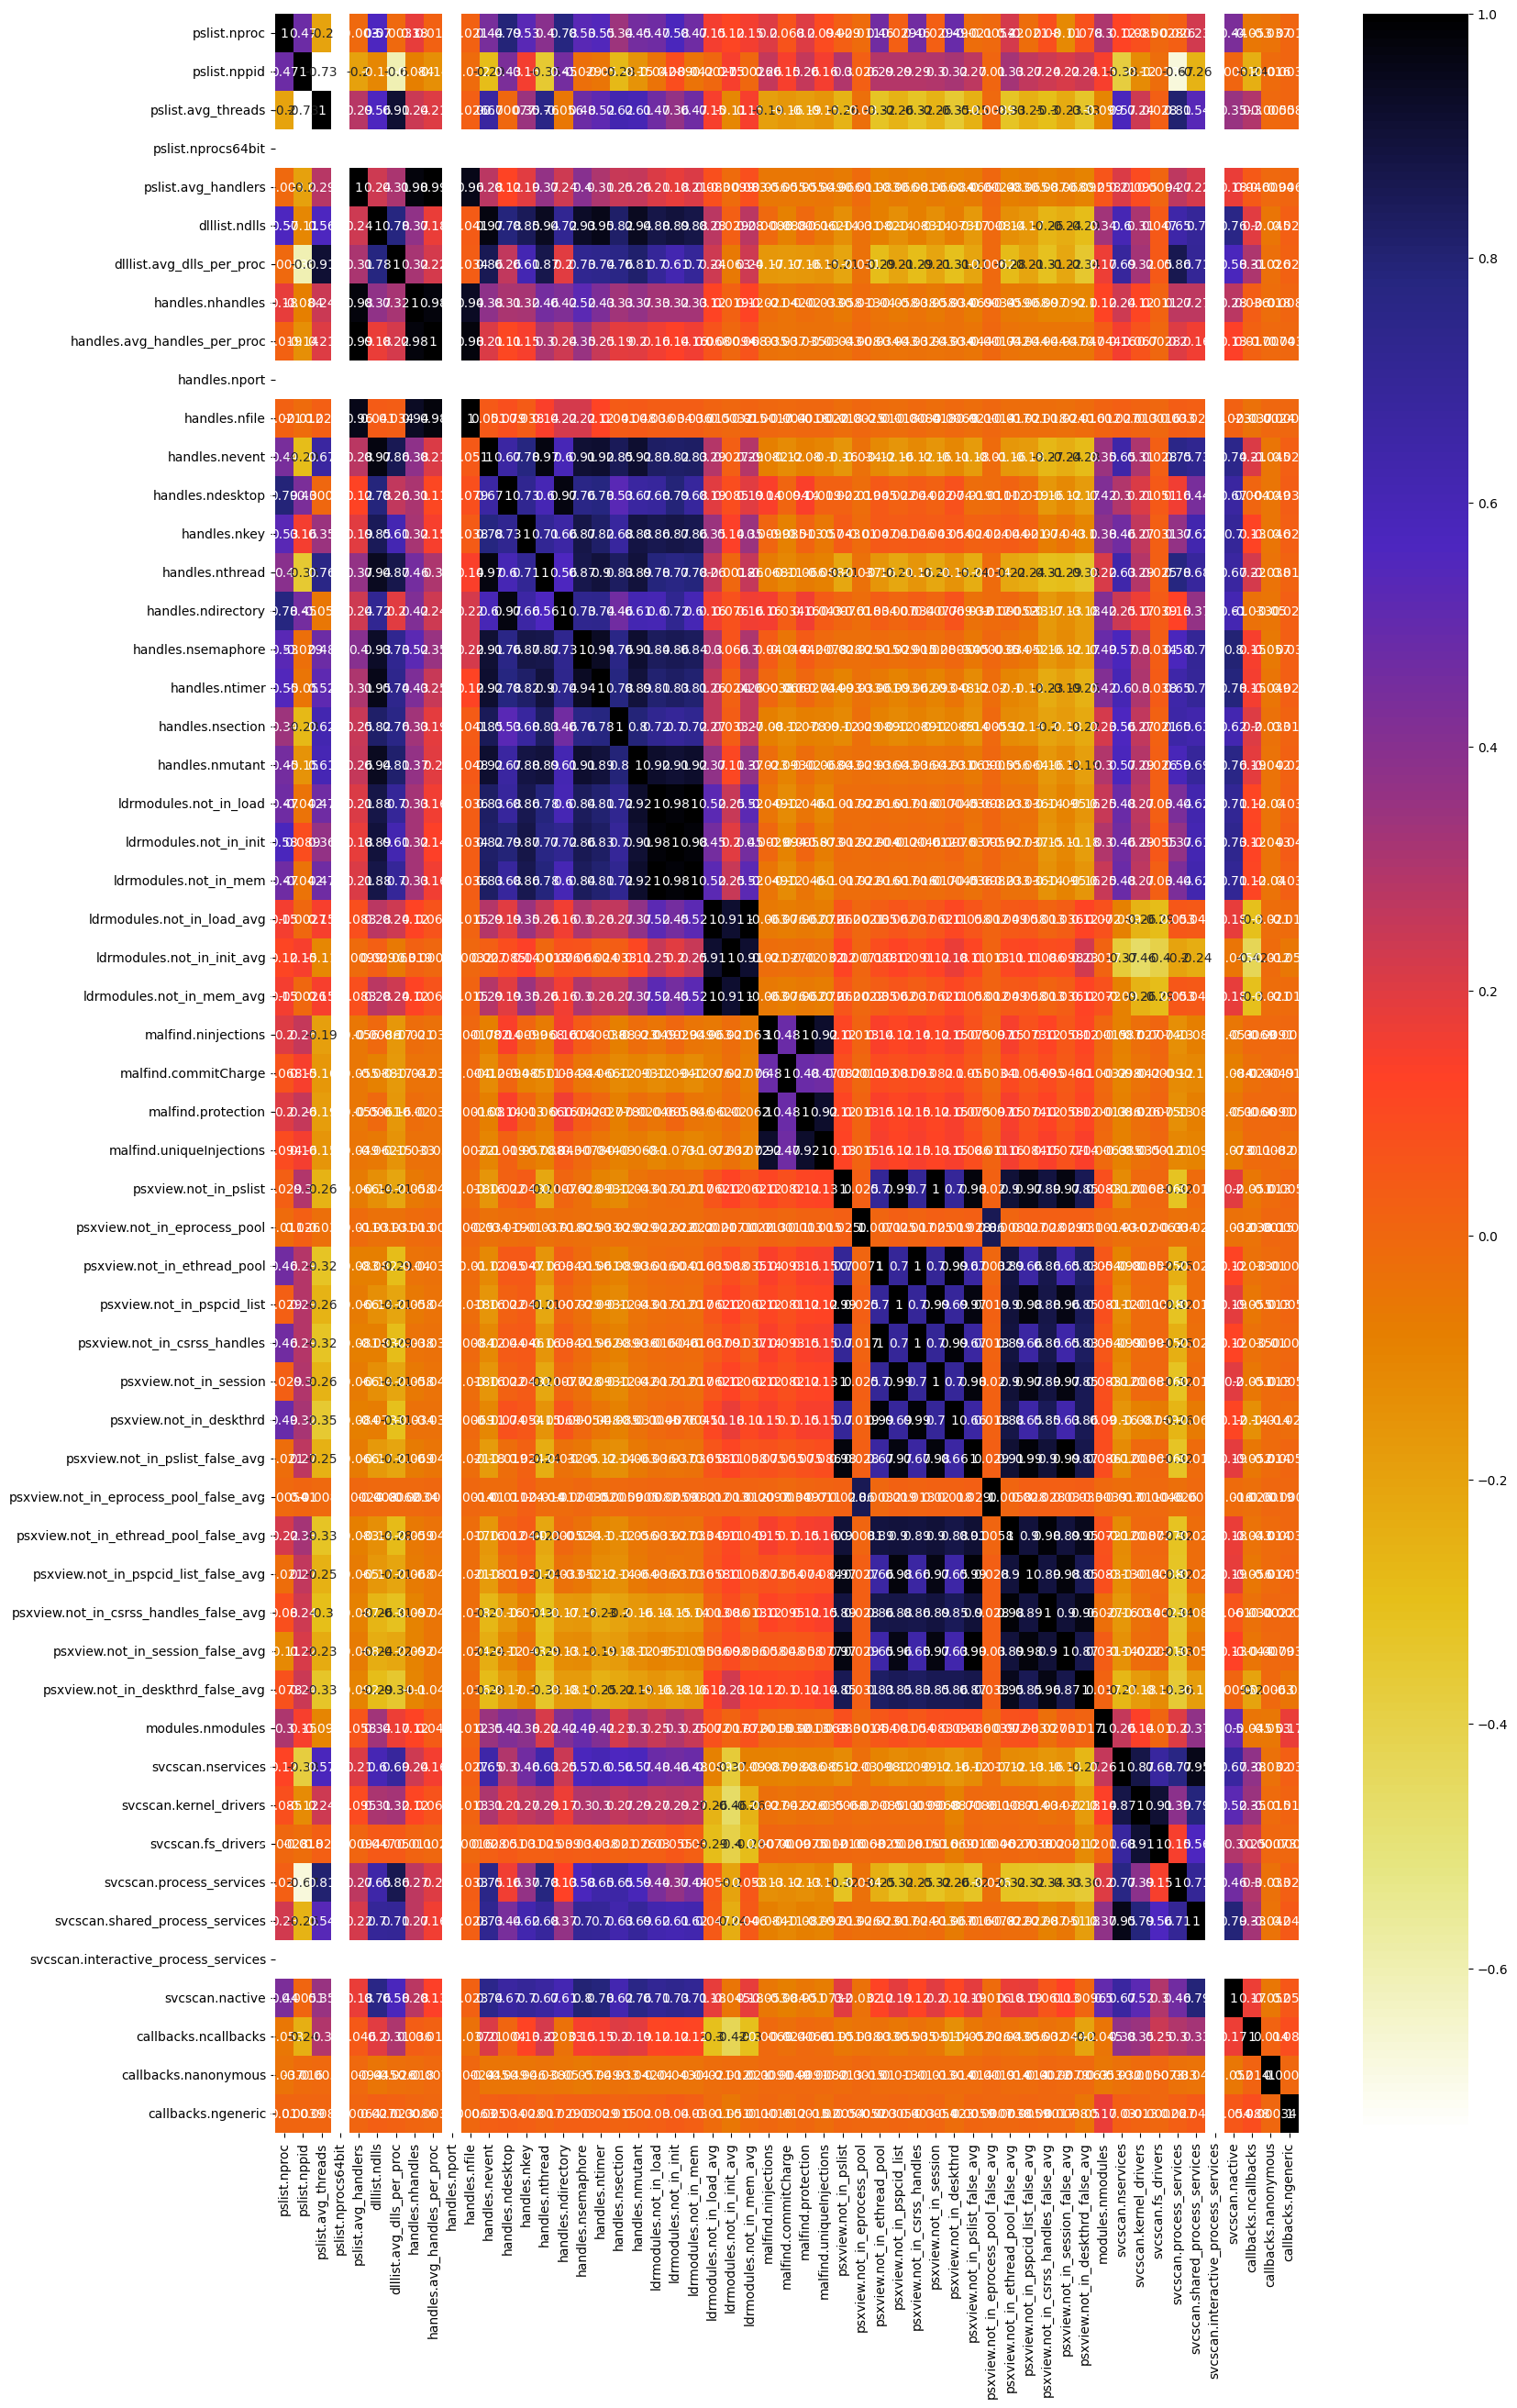

In [52]:
cor = X_train.corr()
plt.figure(figsize=(18,30))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [53]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: colname = corr_matrix.columns[i]
    col_corr.add(colname)
    return col_corr

In [54]:
corr_features = correlation(X_train, 0.85)
print(corr_features)

<ipython-input-53-2f9ae32964f5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


{'svcscan.shared_process_services'}


In [55]:
print(df['Category'])

0                                                   Benign
1                                                   Benign
2                                                   Benign
3                                                   Benign
4                                                   Benign
                               ...                        
58591    Ransomware-Shade-fa03be3078d1b9840f06745f160eb...
58592    Ransomware-Shade-f56687137caf9a67678cde91e4614...
58593    Ransomware-Shade-faddeea111a25da4d0888f3044ae9...
58594    Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...
58595    Ransomware-Shade-955d9af38346c1755527bd196668e...
Name: Category, Length: 58596, dtype: object


In [56]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,modules.nmodules,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
51402,Trojan-Scar-3eb26a3f39ea816cea88afe6ece4fc48-6...,37,15,10.216216,0,215.486487,1445,39.054054,7973,215.486487,...,138,389,221,26,24,0,119,86,0,8
49327,Trojan-Refroso-355eb70aa7a723c73614dcfa4b72504...,40,17,9.750000,0,207.125000,1572,39.300000,8285,207.125000,...,138,389,221,26,24,0,119,86,0,8
32817,Ransomware-Maze-73f475dd2c38b10ee049fa87373540...,41,17,9.365854,0,203.195122,1556,37.951220,8331,203.195122,...,138,389,221,26,24,0,119,86,0,8
42539,Spyware-TIBS-ac14dc6ad5a32d706a006d3b15a02bc31...,48,19,10.020833,0,199.500000,1799,37.479167,9580,217.727273,...,138,389,221,26,24,0,122,86,0,8
30046,Ransomware-Conti-0b4f92773810d288111306f346b54...,37,15,10.162162,0,214.756757,1444,39.027027,7946,214.756757,...,138,389,221,26,24,0,118,86,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647,Benign,40,13,13.022824,0,293.235879,2018,50.454352,11729,293.235879,...,138,395,222,26,27,0,123,88,0,8
48388,Trojan-Reconyc-8d756f09840240da948f8bb5212787f...,42,16,10.142857,0,205.928571,1606,38.238095,8649,205.928571,...,138,389,221,26,24,0,122,87,0,8
37958,Spyware-CWS-0b217feacb94b5c8c3383532e228e8bba2...,38,15,10.026316,0,213.973684,1494,39.315789,8131,213.973684,...,138,389,221,26,24,0,119,86,0,8
47463,Trojan-Reconyc-08ae1a6cf300b5c5faf90-7.raw,41,16,9.463415,0,203.317073,1549,37.780488,8336,203.317073,...,138,389,221,26,24,0,119,86,0,8


In [74]:
df['Category'] = pd.to_numeric(df['Category'], errors='coerce')
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

print(df['Category'])
print(df['Class'])

0           0
1           0
2           0
3           0
4           0
         ... 
58591    9362
58592    9282
58593    9411
58594    9325
58595    9042
Name: Category, Length: 58596, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
58591    1
58592    1
58593    1
58594    1
58595    1
Name: Class, Length: 58596, dtype: int64


In [68]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'column_name' is the string column to be converted
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Class'] = label_encoder.fit_transform(df['Class'])

In [75]:
df['Category']

0           0
1           0
2           0
3           0
4           0
         ... 
58591    9362
58592    9282
58593    9411
58594    9325
58595    9042
Name: Category, Length: 58596, dtype: int64

In [76]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns

ValueError: ignored